In [48]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.io import wavfile
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import requests
from bs4 import BeautifulSoup

# 1. Image

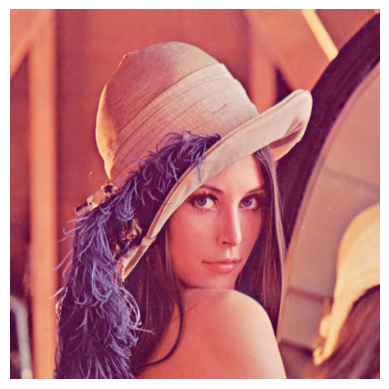

In [5]:
img = cv2.imread("Lenna.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [6]:
print("Ukuran Citra Warna: ", img.shape)
print("Matriks dari Citra Warna pada baris 0 dan kolom 0: ", img[0,0])

Ukuran Citra Warna:  (500, 500, 3)
Matriks dari Citra Warna pada baris 0 dan kolom 0:  [124 137 226]


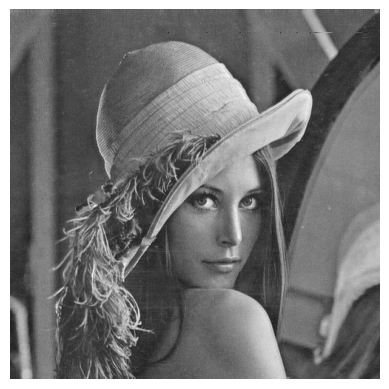

In [7]:
(blue, green, red) = cv2.split(img)
plt.imshow(blue, cmap='gray')
plt.axis('off')
plt.show()

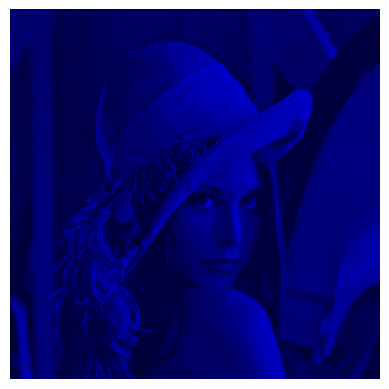

In [8]:
zeroMatrix = np.zeros(img.shape[:2], img.dtype)
m = zeroMatrix
blue_channel_img = cv2.merge([blue, m, m])
plt.imshow(cv2.cvtColor(blue_channel_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Tugas Praktikum I

1. Modifikasi kode bagian (a) agar dapat menampilkan citra ‘Lenna.png’ dalam grayscale.

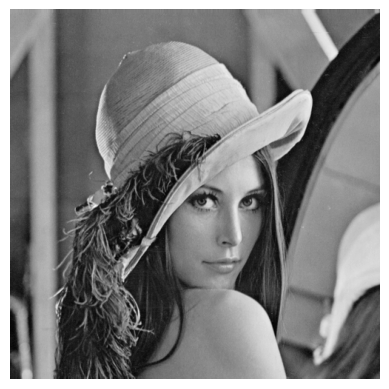

In [9]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray")
plt.axis("off")
plt.show()

2. Modifikasi kode bagian (a) agar bisa melakukan crop pada citra ‘Lenna.png’ (terserah 
dibagian mana saja).

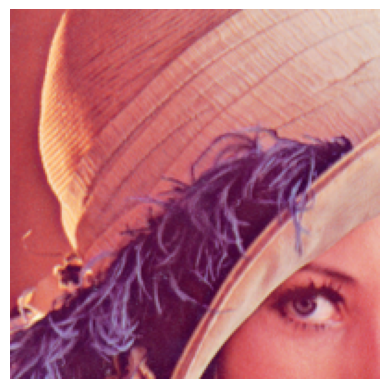

In [10]:
img_crop = img[100:300, 100:300]
img_crop_rgb = cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB)
plt.imshow(img_crop_rgb)
plt.axis("off")
plt.show()

3. Modifikasi kode bagian (b) agar dapat menampilkan ukuran citra grayscale dari 
‘Lenna.png’ dan nilai matriks dari citra grayscale ‘Lenna.pg’ pada baris ke-0 dan kolom 
ke-0. Apakah hasilnya berbeda dengan bagian (b), jelaskan alasannya.

In [11]:
print("Ukuran Citra Grayscale: ", img_gray.shape)
print("Matriks dari Citra Warna pada baris 0 dan kolom 0: ", img_gray[0,0])

Ukuran Citra Grayscale:  (500, 500)
Matriks dari Citra Warna pada baris 0 dan kolom 0:  162


Berbeda dengan ukuran citra warna pada aslinya karena pada Grayscale hanya terdapat 1 channel nilai. Sementara itu pada ukuran citra warna aslinya terdapat 3 channel yaitu Red, Green dan Blue.

4. Modifikasi kode bagian (c) untuk menampilkan channel Green dan Red. 

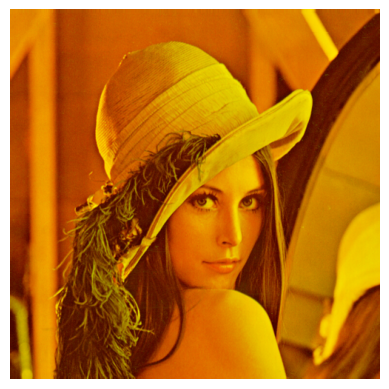

In [12]:
green_red_img = [m, green, red]
img_ch = cv2.merge(green_red_img)
plt.imshow(cv2.cvtColor(img_ch, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

5. Simpanlah file ‘Lenna.png’ menjadi format JPEG dengan menggunakan method 
imwrite pada OpenCV, apakah terdapat perbedaan nilai array pada file citra asli dan file 
dengan format JPEG? Jelaskan alasannya.

In [13]:
cv2.imwrite("Lenna.jpeg", img)
img_jpeg = cv2.imread("Lenna.jpeg")
beda = cv2.absdiff(img, img_jpeg)
print("Nilai selisih minimum:", beda.min())
print("Nilai selisih maksimum:", beda.max())


Nilai selisih minimum: 0
Nilai selisih maksimum: 86


Ukuran dimensi dari kedua citra masih sama yaitu 500 x 500 px, namun terdapat perbedaan pada nilai array yang memiliki selisih terbesar yaitu 86. M

# 2. Audio

a. Membuat sinyal audio berupa gelombang

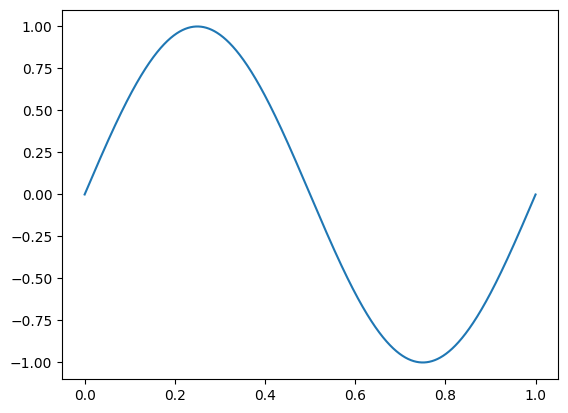

In [14]:
sr = 44100
freq = 1
length = 1
t = np.arange(0, length, 1.0/sr)
signal = np.sin(np.pi*2*freq*t)
plt.plot(t, signal)
plt.show()

In [15]:
wavfile.write("file4.wav", sr, signal)

b. Membuat agar terdengar manusia (mengganti frekuensi)

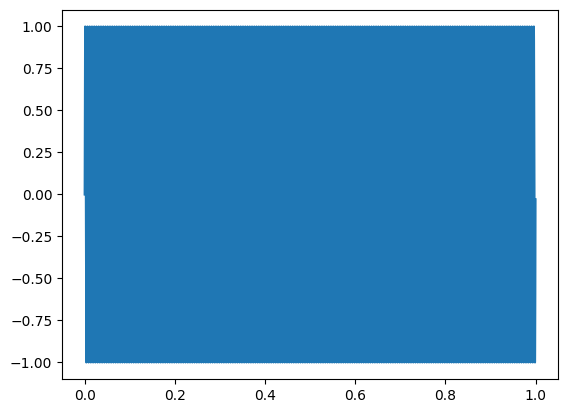

In [16]:
freq = 200
signal = np.sin(np.pi*2*freq*t)
plt.plot(t, signal)
plt.show()
wavfile.write("file1.wav", sr, signal)

## Tugas Praktikum II

1. Modifikasi kode bagian (a) agar membuat gelombang suara dengan frekuensi 400. Berapa 
panjang gelombangnya sekarang? Apakah file suara yang dihasilkan frekuensi 400 berbeda 
dengan file suara yang dihasilkan kode bagian (b)? jelaskan alasannya. 

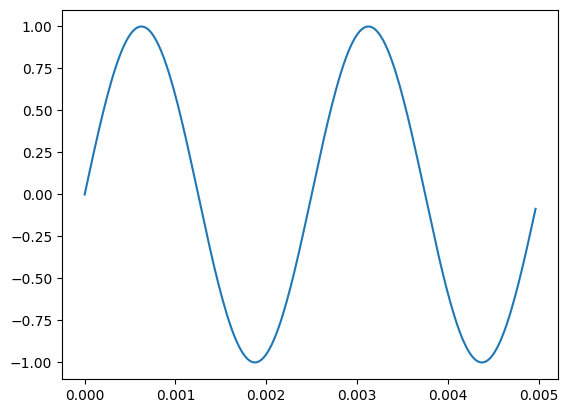

In [17]:
sr = 44100
freq1 = 400
length = 1
t = np.arange(0, length, 1.0/sr)
signal1 = np.sin(np.pi*2*freq1*t)
plt.plot(t[:int(sr*0.005)], signal1[:int(sr*0.005)])
plt.show
wavfile.write("file2.wav", sr, signal1)

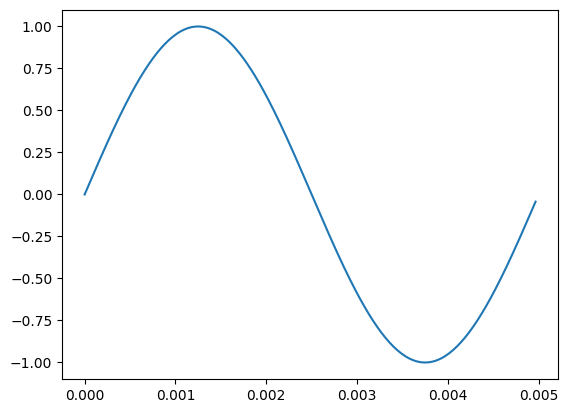

In [18]:
freq2 = 200
signal2 = np.sin(np.pi*2*freq2*t)
plt.plot(t[:int(sr*0.005)], signal2[:int(sr*0.005)])
plt.show
wavfile.write("file3.wav", sr, signal2)

Panjang gelombang pada kode bagian A adalah 2,5 ms dengan 1/400, sementara pada kode B memiliki 5 ms dengan hasil dari 1/200. Dalam segi suara, frekuensi 400 memiliki suara yang lebih tinggi dibanding frekuensi 200.

2. Modifikasi kode bagian (b) dengan mengganti nilai amplitudo menjadi 50. Pada output 
gelombang, berapakah panjang dan tinggi gelombang sekarang? Apakah terdapat 
perbedaan bunyi dengan hasil suara dari kode bagian (b)? jelaskan alasannya. 

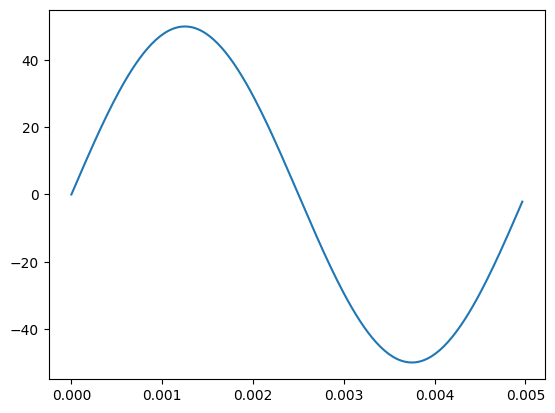

In [19]:
freq2 = 200
signal2 = 50 * np.sin(np.pi*2*freq2*t)
plt.plot(t[:int(sr*0.005)], signal2[:int(sr*0.005)])
plt.show
wavfile.write("file5.wav", sr, signal2)

Perbedaan terjadi hanya pada keras/lembut (loudness) karena frekuensi tetap 200 Hz, tapi dengan software VLC loudness dinormalisasi sehingga tidak terdengar perbedaanya. Selain itu tinggi gelombang juga hingga lebih dari 40

# 3. Text

a. ASCII

In [20]:
char = "A"
print(ord(char))
ascii = 65
print(chr(ascii))

65
A


b. One Hot Encoding (OHE)

In [21]:
docs = "I ate an apple"

# memisah kalimat menjadi token
split_docs = docs.split(" ")
data = [doc.split(" ") for doc in split_docs]
values = array(data).ravel()

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[0 3 1 2]
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


c. CountVectorizer 

In [22]:
text = ["everybody love nlp", "nlp is so cool",
"nlp is all about helping machines process language",
"this tutorial is on basic nlp technique"]
vectorizer = CountVectorizer()
vectorizer.fit(text)
print(vectorizer.vocabulary_)
vector = vectorizer.transform(text)
print(vector.shape)
print(vector.toarray())

{'everybody': 4, 'love': 8, 'nlp': 10, 'is': 6, 'so': 13, 'cool': 3, 'all': 1, 'about': 0, 'helping': 5, 'machines': 9, 'process': 12, 'language': 7, 'this': 15, 'tutorial': 16, 'on': 11, 'basic': 2, 'technique': 14}
(4, 17)
[[0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0]
 [1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1]]


d. TF-IDF 

In [23]:
text1 = ['i love nlp', "nlp is so cool",
"nlp is all about helping machines process language",
"this tutorial is on basic nlp technique"]
tf = TfidfVectorizer()
txt_fitted = tf.fit(text1)
txt_transformed = txt_fitted.transform(text1)
idf = tf.idf_
print(dict(zip(txt_fitted.get_feature_names_out(), idf)))

{'about': 1.916290731874155, 'all': 1.916290731874155, 'basic': 1.916290731874155, 'cool': 1.916290731874155, 'helping': 1.916290731874155, 'is': 1.2231435513142097, 'language': 1.916290731874155, 'love': 1.916290731874155, 'machines': 1.916290731874155, 'nlp': 1.0, 'on': 1.916290731874155, 'process': 1.916290731874155, 'so': 1.916290731874155, 'technique': 1.916290731874155, 'this': 1.916290731874155, 'tutorial': 1.916290731874155}


## Tugas Praktikum II

1. Modifikasi kode bagian (a) agar bisa menampilkan ASCII code untuk kata ‘datA mining’

In [24]:
text = "datA mining"
for ch in text:
    print(ch, ":", ord(ch))


d : 100
a : 97
t : 116
A : 65
  : 32
m : 109
i : 105
n : 110
i : 105
n : 110
g : 103


2. Tambahkan kode bagian (b) agar bisa menampilkan kembali kata pertama yang di lakukan 
one-hot encoding 

In [27]:
first_onehot = onehot_encoded[0]                
first_index = first_onehot.argmax()            
first_word = label_encoder.inverse_transform([first_index])[0]  
print(first_word)

I


3. Download file tugas_text_representation.csv dari hebat e learning, kemudian lakukan 
CountVectorizer dan TF-IDF pada korpus tersebut. Jelaskan hasil yang didapatkan

In [ ]:
url = "https://id.wikipedia.org/wiki/One_Piece"
headers = {"User-Agent": "Mozilla/5.0"}
html = requests.get(url, headers=headers).text
soup = BeautifulSoup(html, "html.parser")
container = soup.select_one("div.mw-parser-output")
# hapus tag catatan kaki dan span kecil yang ganggu
for tag in container.find_all(["sup", "span", "style"]):
    tag.decompose()
paras = [p.get_text(" ", strip=True) for p in container.find_all("p")]
text = " ".join(p for p in paras if p)
# ambil 500 kata pertama
words = text.split()[:500]
summary = " ".join(words)
print(summary)
print("\nJumlah kata:", len(words))
with open("onepiece_summary.txt", "w", encoding="utf-8") as f:
    f.write(summary)

One Piece adalah sebuah seri manga Jepang yang ditulis dan diilustrasikan oleh Eiichiro Oda . Manga ini telah dimuat di majalah Weekly Shōnen Jump milik Shueisha sejak tanggal 22 Juli 1997, dan telah dibundel menjadi 105 volume tankōbon hingga Maret 2023. Ceritanya mengisahkan petualangan Monkey D. Luffy , seorang anak laki-laki yang memiliki kemampuan tubuh elastis seperti karet setelah memakan Buah Iblis secara tidak disengaja. Luffy bersama kru bajak lautnya, yang dinamakan Bajak Laut Topi Jerami , menjelajahi Grand Line untuk mencari harta karun terbesar di dunia yang dikenal sebagai "One Piece" dalam rangka untuk menjadi Raja Bajak Laut yang berikutnya. Manga ini telah diadaptasi menjadi sebuah animasi video asli (OVA) yang diproduksi oleh Production I.G pada tahun 1998, dan sebuah serial anime yang diproduksi oleh Toei Animation , yang mulai tayang di Jepang pada tahun 1999. Sebagai tambahan, Toei juga telah memproduksi tiga belas film animasi, satu OVA dan sebelas episode khusus

In [ ]:
with open("onepiece_summary.txt", "r", encoding="utf-8") as f:
    text = f.read()
documents = [doc.strip() for doc in text.split(".") if doc.strip()]
# CountVectorizer

cv = CountVectorizer()
cv_matrix = cv.fit_transform(documents)
cv_df = pd.DataFrame(cv_matrix.toarray(), columns=cv.get_feature_names_out())
print("Ukuran Matriks:", cv_matrix.shape)
print(cv_df.head(10))  # tampilkan 10 dokumen pertama


Ukuran Matriks: (32, 262)
   000  100  105  11  140  1997  1998  1999  20  2004  ...  untuk  utara  \
0    0    0    0   0    0     0     0     0   0     0  ...      0      0   
1    0    0    1   0    0     1     0     0   0     0  ...      0      0   
2    0    0    0   0    0     0     0     0   0     0  ...      0      0   
3    0    0    0   0    0     0     0     0   0     0  ...      0      0   
4    0    0    0   0    0     0     0     0   0     0  ...      2      0   
5    0    0    0   0    0     0     0     0   0     0  ...      0      0   
6    0    0    0   0    0     0     1     1   0     0  ...      0      0   
7    0    0    0   0    0     0     0     0   0     0  ...      0      0   
8    0    0    0   0    0     0     0     0   0     0  ...      0      0   
9    0    0    0   0    0     0     0     0   0     0  ...      1      1   

   versi  video  viz  volume  web  weekly  world  yang  
0      0      0    0       0    0       0      0     1  
1      0      0    0   

In [69]:
# TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(documents)

# Konversi ke DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Rata-rata nilai tiap kata (supaya bisa diurutkan)
tfidf_mean = tfidf_df.mean().sort_values(ascending=True)

print("Kata dengan skor TF-IDF terkecil:")
print(tfidf_mean.head(20))


Kata dengan skor TF-IDF terkecil:
kesuksesan     0.003943
bleach         0.003943
fairy          0.003943
gabungan       0.003943
gintama        0.003943
bakuman        0.003943
kimi           0.003943
melebihi       0.003943
bahkan         0.003943
ni             0.003943
todoke         0.003943
naruto         0.003943
tail           0.003943
menjelajahi    0.004941
berikutnya     0.004941
bersama        0.004941
topi           0.004941
dikenal        0.004941
dinamakan      0.004941
terbesar       0.004941
dtype: float64


In [ ]:
tf = TfidfVectorizer() 
txt_fitted = tf.fit(documents) 
txt_transformed = txt_fitted.transform(documents) 
idf = tf.idf_ 
idf_dict = dict(zip(txt_fitted.get_feature_names_out(), idf)) 
sorted_idf = dict(sorted(idf_dict.items(), key=lambda x: x[1])) 
print(sorted_idf)

{'dan': 1.8574502318512216, 'manga': 1.8574502318512216, 'one': 2.01160091167848, 'piece': 2.01160091167848, 'telah': 2.01160091167848, 'di': 2.1939224684724348, 'pada': 2.2992829841302607, 'yang': 2.2992829841302607, 'ini': 2.4170660197866445, 'oleh': 2.4170660197866445, '000': 2.7047480922384253, 'tahun': 2.7047480922384253, 'jepang': 2.8870696490323797, 'jump': 2.8870696490323797, 'menjadi': 2.8870696490323797, 'untuk': 2.8870696490323797, 'volume': 2.8870696490323797, 'dalam': 3.1102132003465894, 'dari': 3.1102132003465894, 'diproduksi': 3.1102132003465894, 'eiichiro': 3.1102132003465894, 'hingga': 3.1102132003465894, 'juga': 3.1102132003465894, 'mulai': 3.1102132003465894, 'oda': 3.1102132003465894, 'penjualan': 3.1102132003465894, 'rekor': 3.1102132003465894, 'sebagai': 3.1102132003465894, 'sebuah': 3.1102132003465894, 'sejarah': 3.1102132003465894, 'seri': 3.1102132003465894, 'shonen': 3.1102132003465894, 'terjual': 3.1102132003465894, 'terlaris': 3.1102132003465894, 'toei': 3.1

4. Modifikasi kode bagian (d) agar bisa menampilkan grafik dari tiap kata. contohnya seperti 
gambar di bawah

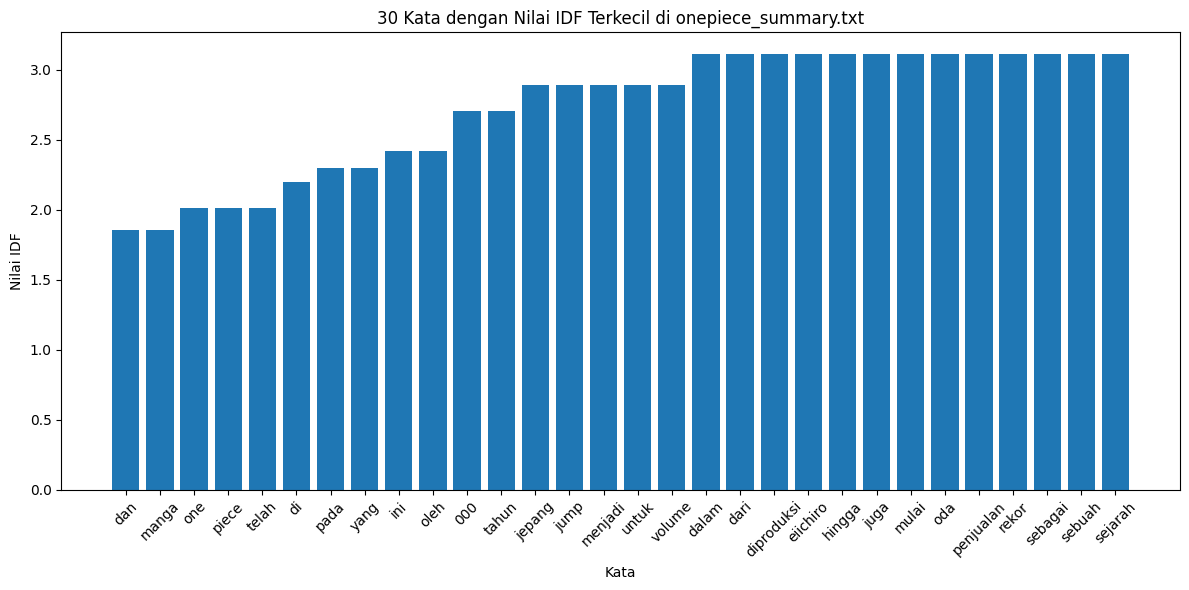

In [ ]:
words = list(sorted_idf.keys())[:30]    
scores = list(sorted_idf.values())[:30] 
plt.figure(figsize=(12, 6)) 
plt.bar(words, scores) 
plt.xlabel("Kata") 
plt.ylabel("Nilai IDF") 
plt.title("30 Kata dengan Nilai IDF Terkecil di onepiece_summary.txt") 
plt.xticks(rotation=45)  # biar lebih rapi
plt.tight_layout() 
plt.show() 